# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns



<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingRegressor
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
df = pd.read_csv("data/WHR2018Chapter2OnlineData.csv")

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

## Exploring the data & Handling the missing data

Performing data exploration to better understand the nature of the data and the problem in hand.

In [4]:
df.shape

(1562, 19)

In [5]:
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
count,1562.000000,1562.000000,1535.000000,1549.000000,1553.000000,1533.000000,1482.000000,1472.000000,1544.000000,1550.000000,1401.000000,1391.000000,1391.000000,1562.000000,1562.000000,583.000000,1386.000000,1205.000000
mean,2011.820743,5.433676,9.220822,0.810669,62.249887,0.728975,0.000079,0.753622,0.708969,0.263171,0.480207,-0.126617,0.004947,2.003501,0.387271,0.372846,0.386948,0.445204
std,3.419787,1.121017,1.184035,0.119370,7.960671,0.145408,0.164202,0.185538,0.107644,0.084006,0.190724,0.873259,0.981052,0.379684,0.119007,0.086609,0.083694,0.105410
min,2005.000000,2.661718,6.377396,0.290184,37.766476,0.257534,-0.322952,0.035198,0.362498,0.083426,0.068769,-2.448228,-2.144974,0.863034,0.133908,0.241000,0.228833,0.223470
25%,2009.000000,4.606351,8.310665,0.748304,57.299580,0.633754,-0.114313,0.697359,0.621471,0.204116,0.334732,-0.772010,-0.717463,1.737934,0.309722,0.307000,0.321583,0.368531
50%,2012.000000,5.332600,9.398610,0.833047,63.803192,0.748014,-0.022638,0.808115,0.717398,0.251798,0.463137,-0.225939,-0.210142,1.960345,0.369751,0.349000,0.371000,0.425395
75%,2015.000000,6.271025,10.190634,0.904329,68.098228,0.843628,0.094649,0.880089,0.800858,0.311515,0.610723,0.665944,0.717996,2.215920,0.451833,0.433500,0.433104,0.508579
max,2017.000000,8.018934,11.770276,0.987343,76.536362,0.985178,0.677773,0.983276,0.943621,0.704590,0.993604,1.540097,2.184725,3.527820,1.022769,0.648000,0.626000,0.961435


In [6]:
df.dtypes

country                                                      object
year                                                          int64
Life Ladder                                                 float64
Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                            float64
Freedom to make life choices                                float64
Generosity                                                  float64
Perceptions of corruption                                   float64
Positive affect                                             float64
Negative affect                                             float64
Confidence in national government                           float64
Democratic Quality                                          float64
Delivery Quality                                            float64
Standard deviation of ladder by country-year    

Handling the missing values, replacing the missing values with the mean of the column:

In [7]:
df.isnull().sum()

country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                              18
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by cou

In [8]:
new_df = df.fillna(df.mean())
new_df.shape
new_df.isnull().sum()

country                                                     0
year                                                        0
Life Ladder                                                 0
Log GDP per capita                                          0
Social support                                              0
Healthy life expectancy at birth                            0
Freedom to make life choices                                0
Generosity                                                  0
Perceptions of corruption                                   0
Positive affect                                             0
Negative affect                                             0
Confidence in national government                           0
Democratic Quality                                          0
Delivery Quality                                            0
Standard deviation of ladder by country-year                0
Standard deviation/Mean of ladder by country-year           0
GINI ind

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

## Feature Selection

In [9]:
correlation_matrix= new_df.corr()
correlation_matrix

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
year,1.000000,-0.014505,0.050698,-0.052672,0.100778,0.132808,-0.013357,-0.049504,-0.024608,0.171085,-0.018198,-0.015156,-0.009595,0.273838,0.209680,-0.026439,-0.025493,0.046503
Life Ladder,-0.014505,1.000000,0.772222,0.697204,0.729544,0.523331,0.199116,-0.417145,0.552625,-0.266959,-0.082552,0.577380,0.672152,-0.154257,-0.756076,-0.054828,-0.163574,-0.258210
Log GDP per capita,0.050698,0.772222,1.000000,0.644087,0.834498,0.357511,-0.000327,-0.335832,0.304582,-0.115385,-0.153403,0.592370,0.727472,-0.085646,-0.551523,-0.168818,-0.288835,-0.303249
Social support,-0.052672,0.697204,0.644087,1.000000,0.585430,0.416198,0.075182,-0.214673,0.457616,-0.352517,-0.155389,0.508450,0.515988,-0.173715,-0.593374,-0.077062,-0.121941,-0.272061
Healthy life expectancy at birth,0.100778,0.729544,0.834498,0.585430,1.000000,0.338733,0.046216,-0.305440,0.296879,-0.104382,-0.185814,0.571441,0.690087,-0.065713,-0.525759,-0.139077,-0.347646,-0.352525
Freedom to make life choices,0.132808,0.523331,0.357511,0.416198,0.338733,1.000000,0.345517,-0.485877,0.611844,-0.280354,0.382096,0.415104,0.454590,-0.080510,-0.367442,0.026808,0.053399,0.093191
Generosity,-0.013357,0.199116,-0.000327,0.075182,0.046216,0.345517,1.000000,-0.290899,0.369968,-0.111104,0.259434,0.109483,0.188582,-0.177881,-0.185500,-0.011054,-0.041190,0.168853
Perceptions of corruption,-0.049504,-0.417145,-0.335832,-0.214673,-0.305440,-0.485877,-0.290899,1.000000,-0.297001,0.259926,-0.412846,-0.296283,-0.477250,0.294766,0.372704,0.096715,0.148058,-0.036374
Positive affect,-0.024608,0.552625,0.304582,0.457616,0.296879,0.611844,0.369968,-0.297001,1.000000,-0.382031,0.137078,0.348364,0.344269,-0.069188,-0.408932,0.232988,0.284076,0.107525
Negative affect,0.171085,-0.266959,-0.115385,-0.352517,-0.104382,-0.280354,-0.111104,0.259926,-0.382031,1.000000,-0.146214,-0.181800,-0.192958,0.509119,0.519415,0.093459,0.068849,0.134722


In [10]:
target = 'Life Ladder'
selected_columns = correlation_matrix[target].abs().sort_values(ascending=False)
print(selected_columns)

Life Ladder                                                 1.000000
Log GDP per capita                                          0.772222
Standard deviation/Mean of ladder by country-year           0.756076
Healthy life expectancy at birth                            0.729544
Social support                                              0.697204
Delivery Quality                                            0.672152
Democratic Quality                                          0.577380
Positive affect                                             0.552625
Freedom to make life choices                                0.523331
Perceptions of corruption                                   0.417145
Negative affect                                             0.266959
gini of household income reported in Gallup, by wp5-year    0.258210
Generosity                                                  0.199116
GINI index (World Bank estimate), average 2000-15           0.163574
Standard deviation of ladder by co

In [11]:
excluded_column = "Standard deviation/Mean of ladder by country-year"
selected_columns = selected_columns.drop(excluded_column)


In [12]:
selected_columns = selected_columns[:11].index 

In [13]:
selected_columns

Index(['Life Ladder', 'Log GDP per capita', 'Healthy life expectancy at birth',
       'Social support', 'Delivery Quality', 'Democratic Quality',
       'Positive affect', 'Freedom to make life choices',
       'Perceptions of corruption', 'Negative affect',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')

In [14]:
new_df = new_df[selected_columns]
new_df.head()

,Life Ladder,Log GDP per capita,Healthy life expectancy at birth,Social support,Delivery Quality,Democratic Quality,Positive affect,Freedom to make life choices,Perceptions of corruption,Negative affect,"gini of household income reported in Gallup, by wp5-year"
0,3.723590,7.168690,49.209663,0.450662,-1.655084,-1.929690,0.517637,0.718114,0.881686,0.258195,0.445204
1,4.401778,7.333790,49.624432,0.552308,-1.635025,-2.044093,0.583926,0.678896,0.850035,0.237092,0.441906
2,4.758381,7.386629,50.008961,0.539075,-1.617176,-1.991810,0.618265,0.600127,0.706766,0.275324,0.327318
3,3.831719,7.415019,50.367298,0.521104,-1.616221,-1.919018,0.611387,0.495901,0.731109,0.267175,0.336764
4,3.782938,7.517126,50.709263,0.520637,-1.404078,-1.842996,0.710385,0.530935,0.775620,0.267919,0.344540


## Splitting the Data

In [15]:
X = new_df.drop(columns=['Life Ladder'])
y = new_df['Life Ladder']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.33, random_state = 123)

## Training the Models

### a) Linear Regression

In [17]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_lr_pred = lr_model.predict(X_test)

In [18]:
lr_rmse = mean_squared_error(y_test, y_lr_pred, squared = False)
lr_r2 = r2_score(y_test, y_lr_pred)

print('[LR] Root Mean Squared Error: {0}'.format(lr_rmse))
print('[LR] R2: {0}'.format(lr_r2))

[LR] Root Mean Squared Error: 0.5426809703559063
[LR] R2: 0.769126939948293


### b) Decision Tree Regression

Performing grid search for decision tree regression and fitting the model with the best parameters:

In [19]:
param_grid = {
    'max_depth': [5, 10, 15],  
    'min_samples_split': [2, 5, 10],   
    'min_samples_leaf': [1, 2, 4]}

In [20]:
dt_model = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2

In [21]:
dt_best_params = grid_search.best_params_
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [22]:
dt_best_estimator = grid_search.best_estimator_
dt_best_predictions = dt_best_estimator.predict(X_test)
dt_rmse = mean_squared_error(y_test, dt_best_predictions, squared=False)
dt_r2 = r2_score(y_test, dt_best_predictions)

print('[DT] Root Mean Squared Error: {0}'.format(dt_rmse))
print('[DT] R2: {0}'.format(dt_r2))

[DT] Root Mean Squared Error: 0.5064102287003485
[DT] R2: 0.7989569742796814


### c) Random Forrest Regression

Performing grid search for random forrest regression and fitting the model with the best parameters:

In [23]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [24]:
rf_model = RandomForestRegressor()
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [25]:
rf_best_params = rf_grid_search.best_params_
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [26]:
rf_best_estimator = rf_grid_search.best_estimator_
rf_best_predictions = rf_best_estimator.predict(X_test)

In [27]:
rf_rmse = mean_squared_error(y_test, rf_best_predictions, squared=False)
rf_r2 = r2_score(y_test, rf_best_predictions)

print('[DT] Root Mean Squared Error: {0}'.format(dt_rmse))
print('[DT] R2: {0}'.format(dt_r2))

[DT] Root Mean Squared Error: 0.5064102287003485
[DT] R2: 0.7989569742796814


### d) Gradient Boosted Decison Tree Regression 

Performing grid search for gradient boosted decision tree regression and fitting the model with the best parameters:

In [28]:
gbdt_model = GradientBoostingRegressor()
grid_search = GridSearchCV(estimator=gbdt_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  2.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [29]:
gbdt_best_params = grid_search.best_params_
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}


In [30]:
gbdt_best_estimator = grid_search.best_estimator_
gbdt_predictions = gbdt_best_estimator.predict(X_test)


In [31]:
gbdt_rmse = mean_squared_error(y_test, gbdt_predictions, squared=False)
gbdt_r2 = r2_score(y_test, gbdt_predictions)

print('[DT] Root Mean Squared Error: {0}'.format(gbdt_rmse))
print('[DT] R2: {0}'.format(gbdt_r2))

[DT] Root Mean Squared Error: 0.41479833438035096
[DT] R2: 0.8651167315499451


### e) Stacking Method

Using the previous parameters for models for computational efficiency and fitting the stacking model with those parameters:

In [32]:
estimators = [
    ("DT", DecisionTreeRegressor(**dt_best_params)),
    ("RF", RandomForestRegressor(**rf_best_params)),
    ("GBDT", GradientBoostingRegressor(**gbdt_best_params)),
    ("LR", LinearRegression())
]

In [33]:
stacking_model = StackingRegressor(estimators = estimators, cv =5, passthrough= False)

In [34]:
stacking_model.fit(X_train, y_train)
stacking_predictions = stacking_model.predict(X_test)


In [35]:
stacking_rmse = mean_squared_error(y_test, stacking_predictions, squared=False)
stacking_r2 = r2_score(y_test, stacking_predictions)

print('[Stacking Regressor] Root Mean Squared Error: {0}'.format(stacking_rmse))
print('[Stacking Regressor] R2: {0}'.format(stacking_r2))

[Stacking Regressor] Root Mean Squared Error: 0.39590557240647717
[Stacking Regressor] R2: 0.8771239328709903


### f) Neural Network

In [36]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # Output layer, no activation for regression

# Compile the Model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, validation_split=0.1, verbose=1)

y_pred = model.predict(X_test_scaled)

nn_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
nn_r2 = r2_score(y_test, y_pred)

print("[NN] Root Mean Squared Error (RMSE):", nn_rmse)
print("[NN] R-squared (R2) Score:", nn_r2)

Epoch 1/100
15/15 [==============================] - 2s 36ms/step - loss: 23.4577 - mae: 4.7144 - val_loss: 14.3141 - val_mae: 3.6750
Epoch 2/100
15/15 [==============================] - 0s 8ms/step - loss: 8.4793 - mae: 2.6376 - val_loss: 1.2597 - val_mae: 0.9289
Epoch 3/100
15/15 [==============================] - 0s 8ms/step - loss: 1.6056 - mae: 1.0087 - val_loss: 1.0074 - val_mae: 0.8338
Epoch 4/100
15/15 [==============================] - 0s 7ms/step - loss: 1.2162 - mae: 0.8718 - val_loss: 0.5243 - val_mae: 0.5963
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 1.1251 - mae: 0.8372 - val_loss: 0.4114 - val_mae: 0.5329
Epoch 6/100
15/15 [==============================] - 0s 7ms/step - loss: 1.0391 - mae: 0.7995 - val_loss: 0.3907 - val_mae: 0.5169
Epoch 7/100
15/15 [==============================] - 0s 7ms/step - loss: 1.0013 - mae: 0.7875 - val_loss: 0.3806 - val_mae: 0.5102
Epoch 8/100
15/15 [==============================] - 0s 9ms/step - loss: 0.8809 

## Model Comparision

In [37]:
model_scores = {
    'Model': ['Linear Regression', 'Decision Tree', 'Gradient Boosting', 'Random Forest', "Stacking", "Neural Network"],
    'RMSE':  [lr_rmse, dt_rmse, gbdt_rmse, rf_rmse,stacking_rmse, nn_rmse],
    'R2': [lr_r2, dt_r2, gbdt_r2, rf_r2, stacking_r2, nn_r2]
}
model_comparison_df = pd.DataFrame(model_scores)

model_comparison_df

,Model,RMSE,R2
0,Linear Regression,0.542681,0.769127
1,Decision Tree,0.506410,0.798957
2,Gradient Boosting,0.414798,0.865117
3,Random Forest,0.402686,0.872879
4,Stacking,0.395906,0.877124
5,Neural Network,0.540374,0.771086


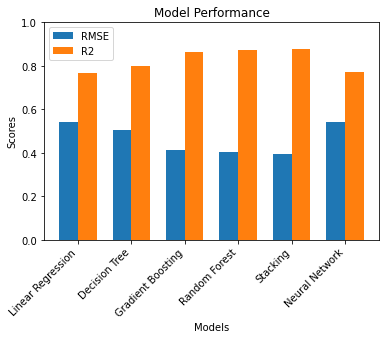

In [38]:
RMSE_Results = [lr_rmse, dt_rmse, gbdt_rmse, rf_rmse, stacking_rmse, nn_rmse]
R2_Results = [lr_r2, dt_r2, gbdt_r2, rf_r2, stacking_r2, nn_r2]

model_names = ['Linear Regression', 'Decision Tree', 'Gradient Boosting', 'Random Forest', 'Stacking', 'Neural Network']

x = np.arange(len(model_names))

width = 0.35

fig, ax = plt.subplots()


rects1 = ax.bar(x, RMSE_Results, width, label='RMSE')
rects2 = ax.bar(x + width, R2_Results, width, label='R2')

ax.set_xticks(x + width / 2)
ax.set_xticklabels(model_names, rotation=45, ha="right")

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance')
ax.set_ylim([0, 1])  # Set y-axis limit

ax.legend()

plt.show()

According to these outcomes the stacking model is the best performing and optimal model for the task. It has the lowest RMSE of 0.39 and highest R2 score of 0.88 indicating accurate predictions and low average error. 

The strong performance is likely due to the combination of various models, leveraging each of their strengths. There is a diverse set of base models incling linear regression, decision trees, gradient boosting and random forrest capturing complex relationships and making robust predictions.

It's complexity seems to be at the optimal spot since Neural Network models performed poorer likely overfitting the model. On the other hand the models with lower complexity such as the Linear Regression model failed to capture the nuances in the dataset and had the worst performance. 